In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [2]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/chellee18/DataMining/refs/heads/main/week%208/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={
    "Annual Income (k$)": "AnnualIncome",
    "Spending Score (1-100)": "SpendingScore"
})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for null values in the dataset
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

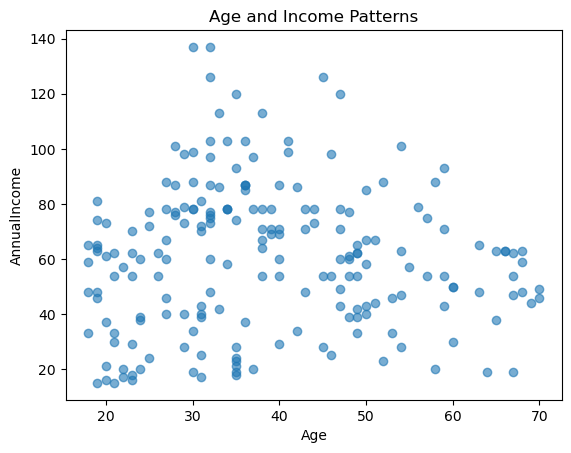

In [6]:
# make an insightful visualization and explain

plt.scatter(df["Age"], df["AnnualIncome"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("AnnualIncome")
plt.title("Age and Income Patterns")
plt.show()

#Scatter plot tersebut menunjukkan hubungan antara usia dan pendapatan tahunan pelanggan. 
#Setiap titik mewakili satu pelanggan, dengan usia di sumbu x dan pendapatan tahunan di sumbu y. 

#Dari grafik ini, terlihat bahwa pendapatan tidak menunjukkan pola yang jelas berdasarkan usia, 
#dengan distribusi pendapatan yang cukup merata di berbagai rentang usia.

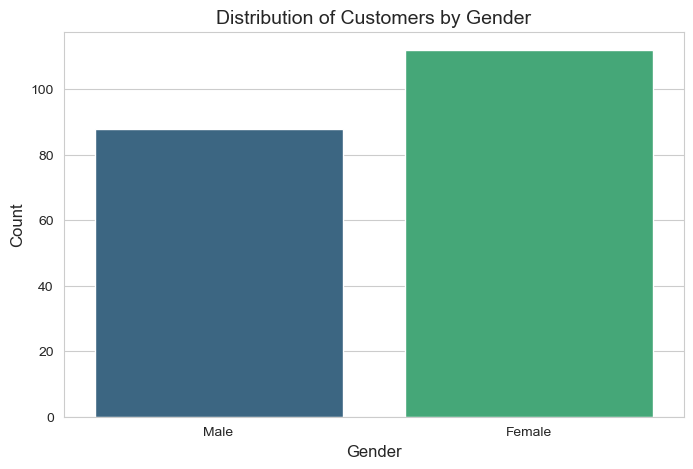

In [7]:
# make an insightful visualization and explain
sns.set_style("whitegrid")

# Create a barplot for the Gender column
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribution of Customers by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#Grafik menunjukkan jumlah pelanggan laki-laki dan perempuan.
#Ini memudahkan untuk melihat distribusi atau perbandingan jumlah berdasarkan jenis kelamin.

## Data Preprocessing

For this case study, we only use income and spending score

In [8]:
# create new dataframe that consist only annual income and spending score
df = df.iloc[:, -2:]
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [9]:
# scale dataset with standard scaler

sc = StandardScaler()

df_scaled= pd.DataFrame(sc.fit_transform(df), columns=["income", "spending"])

df_scaled.head()


,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [10]:
# get stastical information on the new dataset
df_scaled.describe()

,income,spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

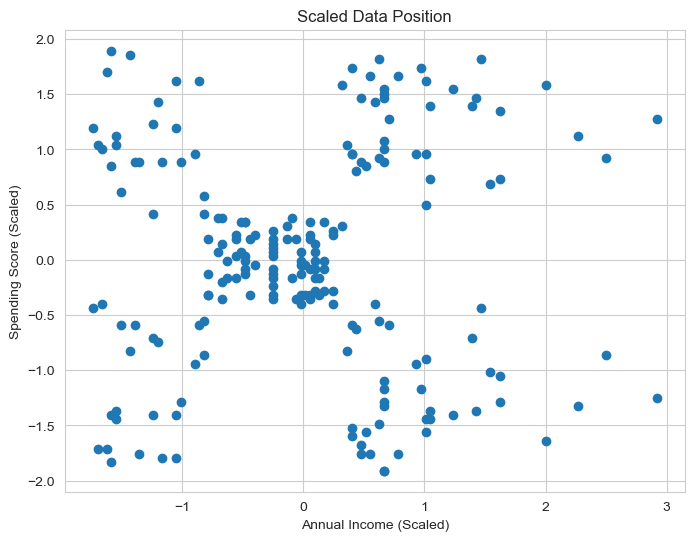

In [11]:
# Visualize the position
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['income'], df_scaled['spending'])
plt.title('Scaled Data Position')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

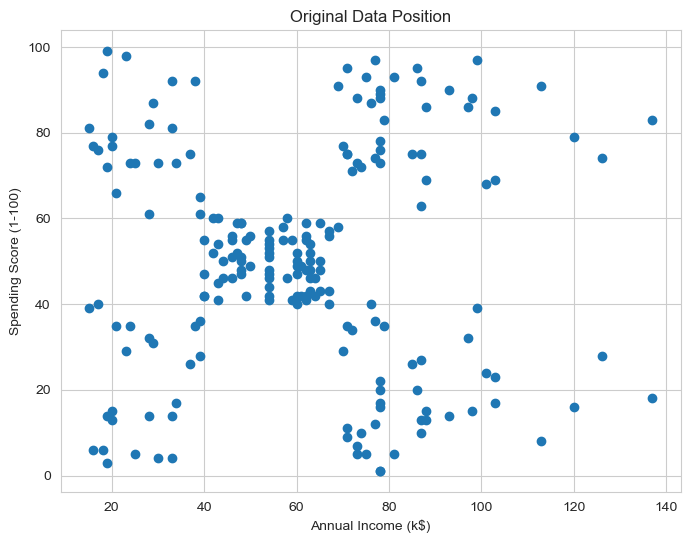

In [12]:
# Visualize the position using the original scale
plt.figure(figsize=(8, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.title('Original Data Position')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [13]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

C:\Users\Michelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Michelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Michelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

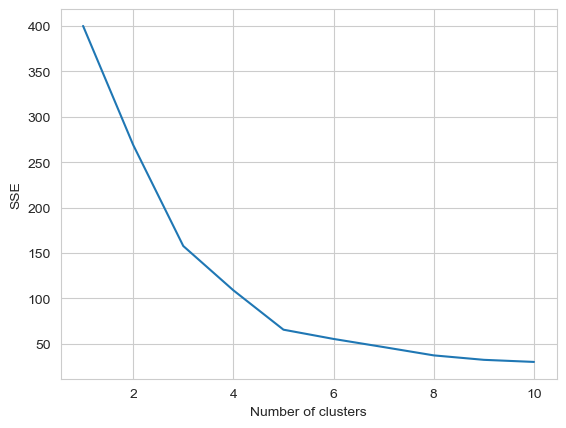

In [14]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [15]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [16]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

C:\Users\Michelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Michelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Visualize your result based on income and spending. You also can show the final position of the centroid.

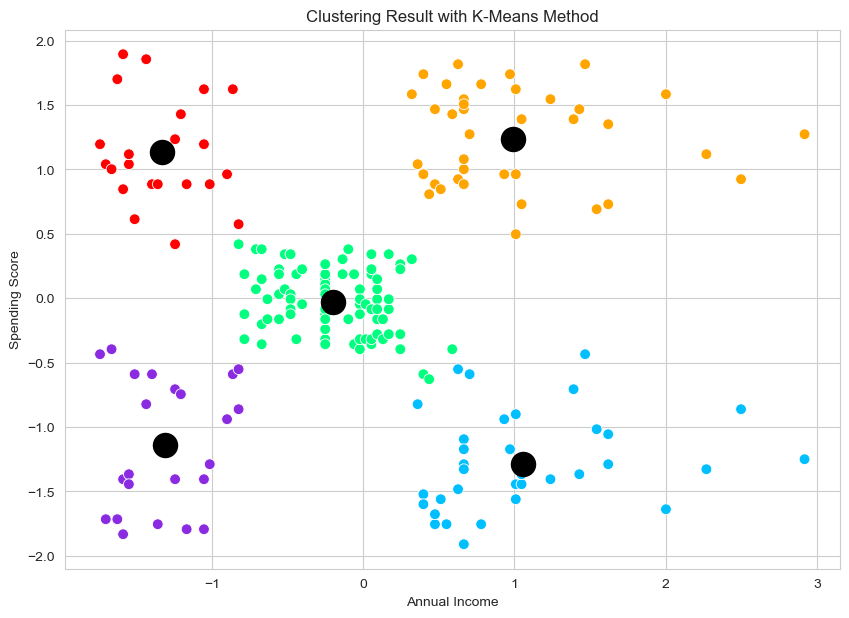

In [17]:
plt.figure(figsize=(10,7))

sns.scatterplot(
    x="income", 
    y="spending", 
    hue=y_pred, 
    palette=["blueviolet", "red", "deepskyblue","orange","springgreen",], 
    legend=None, 
    data=df_scaled, 
    s=60
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [33]:
# Inverse transform the scaled data to get the original values
df_ori = sc.inverse_transform(df_scaled)
df_ori = pd.DataFrame(df_original, columns=['income', 'spending'])
df_ori['Cluster'] = y_pred

df_ori.head()

,income,spending,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [34]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster

cluster_summary = df_ori.groupby('Cluster').agg({'spending': ['mean', 'std', 'min', 'max'],
                                                 'income': ['mean', 'std', 'min', 'max']})
cluster_summary

spending                            income                        
              mean        std   min   max       mean        std   min    max
Cluster                                                                     
0        20.913043  13.017167   3.0  40.0  26.304348   7.893811  15.0   39.0
1        79.363636  10.504174  61.0  99.0  25.727273   7.566731  15.0   39.0
2        17.114286   9.952154   1.0  39.0  88.200000  16.399067  70.0  137.0
3        82.128205   9.364489  63.0  97.0  86.538462  16.312485  69.0  137.0
4        49.518519   6.530909  34.0  61.0  55.296296   8.988109  39.0   76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>

In [22]:
#K-Means clustering identified 5 customer groups based on income and spending. 
#Cluster 0 has low income and spending, Cluster 1 has moderate income and spending, Cluster 2 has high income but low spending, 
#Cluster 3 has both high income and high spending, and Cluster 4 is mixed.
#The company should target premium offers for Cluster 3 and discounts for Cluster 0, while engaging Cluster 1 and 2 with 
#personalized campaigns. Product development should focus on Cluster 4, and loyalty programs should be prioritized for Cluster 3. 
#Further demographic analysis can refine these strategies.